# Time series prediction

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [4]:
airline = pd.read_csv('airline-passengers.csv',index_col='Month', parse_dates=True)
print("Size of dataset--",airline.shape)
airline.head()

Size of dataset-- (144, 1)


,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
air1=airline

<AxesSubplot:title={'center':'Passengers Data'}, xlabel='Month'>

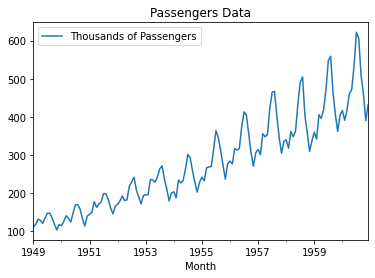

In [6]:
airline.plot(title='Passengers Data')

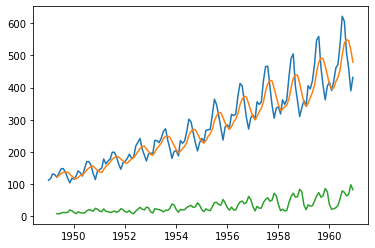

In [7]:
x= airline.rolling(5).mean()
z= airline.rolling(5).std()
plt.plot(airline)
plt.plot(x)
plt.plot(z)

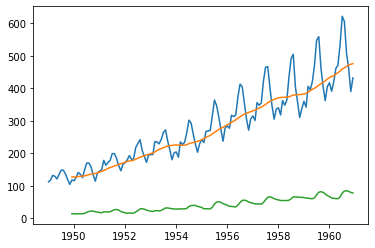

In [8]:
x= airline.rolling(12).mean()
z= airline.rolling(12).std()
plt.plot(airline)
plt.plot(x)
plt.plot(z)

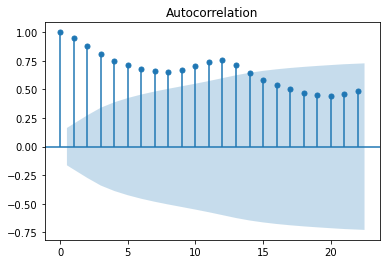

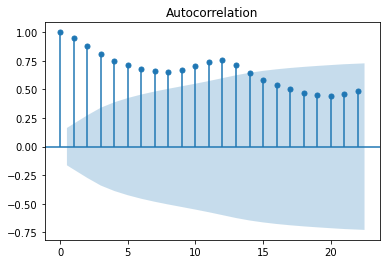

In [9]:
plot_acf(airline)

# Augmented Dickey-Fuller unit root test

Null hypothesis -  data is stationary 
\
alternative hypothesis - data is not stationary 

In [10]:
from statsmodels.tsa.stattools import adfuller
adfuller(airline) 

(0.8153688792060451,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

### As p value is having high value ,so we must reject null hypothesis
## given series is non stationary 

### As it is not stationary we will perform diffrencing to data
### Taking integral -diffrencinf factor (d) as 1 gives stationary ouptut

In [11]:
airline =airline.diff(periods=1)

<AxesSubplot:title={'center':'Passengers Data'}, xlabel='Month'>

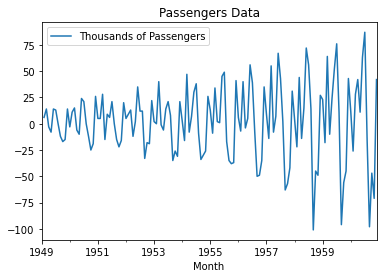

In [12]:
airline.plot(title='Passengers Data')

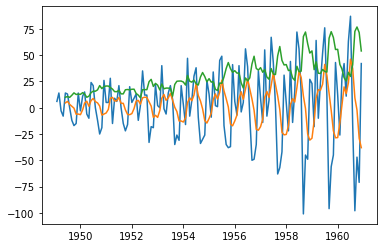

In [13]:
x= airline.rolling(5).mean()
z= airline.rolling(5).std()
plt.plot(airline)
plt.plot(x)
plt.plot(z)

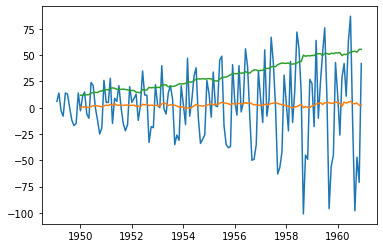

In [14]:
x= airline.rolling(12).mean()
z= airline.rolling(12).std()
plt.plot(airline)
plt.plot(x)
plt.plot(z)

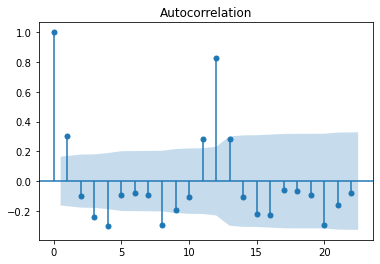

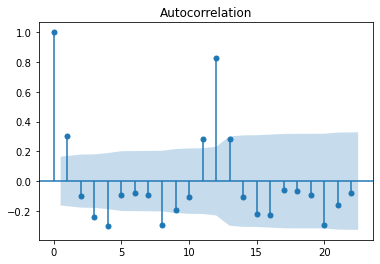

In [15]:
plot_acf(airline[1:])

In [16]:
adfuller(airline[1:]) 

(-2.8292668241699843,
 0.054213290283827556,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [17]:
len(airline[1:])

143

In [18]:
x=airline.values
train_airline=x[1:131]
test_airline=x[131:]

# AutoRegressive Model

In [22]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import ARResults
from sklearn.metrics import mean_squared_error

In [23]:
model=AR(train_airline)
z=model.fit()
x=z.predict(start=130,end=144)


In [24]:
z.k_ar

13

In [25]:
z.params

array([ 4.88364166, -0.35536178, -0.19955015, -0.10629444, -0.21278446,
       -0.0691222 , -0.24311035, -0.08946304, -0.23216216, -0.09691297,
       -0.24470299, -0.05633648,  0.81754448,  0.33947904])

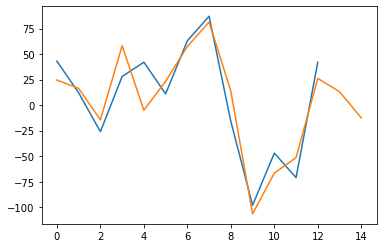

In [26]:

plt.plot(test_airline)
plt.plot(x)

In [27]:
N= len(test_airline)
RSS =0
for i,k in zip(test_airline,x):
    RSS += 1/N* (i-k)**2
    
print(RSS)

[445.92221929]


# Autoregressive Integrated Moving Average ARIMA(p,d,q) Model

In [28]:
air1

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [29]:
x=air1.values
train=x[:131]
test=x[131:]

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
model1=ARIMA(train,order=(2,1,0))
z1=model1.fit()
prediction=[]
prediction=z1.forecast(steps=13)[0]

In [32]:
print("results")
print(z1.k_ar)
print(z1.params)

results
2
[ 1.94457957  0.36781502 -0.20402383]


In [34]:
N= len(test_airline)
RSS =0
for i,k in zip(test_airline,prediction):
    RSS += 1/N* (i-k)**2
    
print(RSS)

[143249.94596935]


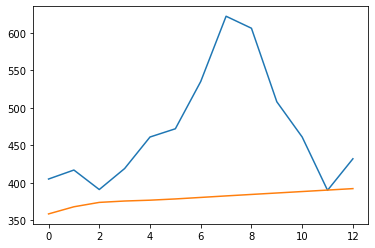

In [35]:
plt.plot(test)
plt.plot(prediction)

In [36]:
import itertools
p=range(1,15)
d=range(0,2)
q=range(0,5)
pdq=list(itertools.product(p,d,q))


### Choose the order which have lowest Akaike’s information criteria

In [37]:
import warnings 
warnings.filterwarnings('ignore')

In [38]:
k=[]
for order in pdq:
    try:
        model1=ARIMA(train,order=order)
        z1=model1.fit()
        k.append(z1.aic)
        print(order,z1.aic)        
    except:
        continue 


(1, 0, 0) 1279.3608405779073
(1, 0, 1) 1262.3606640644318
(1, 0, 2) 1263.4591908110046
(1, 0, 3) 1261.3442777116459
(1, 0, 4) 2093.8786482971136
(1, 1, 0) 1256.2835744706447
(1, 1, 1) 1255.973411099909
(1, 1, 2) 1229.4656930187673
(1, 1, 3) 1231.0367979555522
(1, 2, 0) 1294.8544110657092
(1, 2, 1) 1253.7212066596862
(1, 2, 2) 1244.0517259662602
(2, 0, 0) 1265.2498506415354
(2, 0, 1) 1257.4138778214701
(2, 0, 2) 1285.3850493208279
(2, 0, 3) 1283.9085861830717
(2, 0, 4) 2236.7081211888153
(2, 1, 0) 1252.8700784324742
(2, 1, 1) 1219.806393102722
(2, 1, 2) 1205.545994723959
(2, 1, 3) 1205.2301576442212
(2, 1, 4) 1196.2833834404191
(2, 2, 0) 1287.5711871624258
(2, 2, 1) 1250.7513722294493
(2, 2, 2) 1244.0521358813057
(3, 0, 0) 1263.9595738101225
(3, 0, 1) 1258.28235649621
(3, 0, 2) 1236.4478096693651
(3, 0, 3) 1235.7361373738318
(3, 0, 4) 1234.5147889348714
(3, 1, 0) 1251.5996699498019
(3, 1, 1) 1219.9447948495533
(3, 1, 2) 1215.1512159114297
(3, 1, 3) 1195.665421634324
(3, 1, 4) 1197.32638

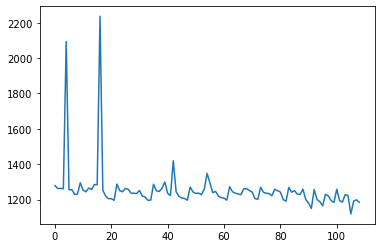

In [39]:
plt.plot(k)

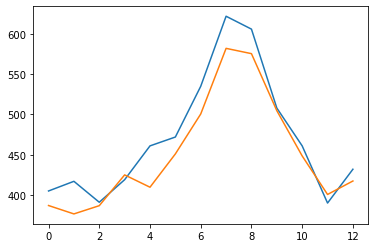

In [40]:
model1=ARIMA(train,order=(10,1,0))
z2=model1.fit()
prediction=[]
prediction=z2.forecast(steps=13)[0]
plt.plot(test)
plt.plot(prediction)

In [41]:
z2.k_ar

10

In [42]:
z2.params

array([ 2.49387243, -0.12650553, -0.71512492, -0.21802118, -0.73595006,
       -0.201216  , -0.73666871, -0.16375052, -0.78231988, -0.20516289,
       -0.83005662])